In [152]:
# Import
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import tensorflow as tf
from tensorflow import keras

In [153]:
# Set random seeds
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

# Combine datasets

In [154]:
# Read the datasets
real_images = pd.read_csv("real_images.csv")
fake_images = pd.read_csv("fake_images.csv")

In [155]:
# Normalize values between 0 and 1
real_images /= 255.
fake_images /= 255.

In [156]:
# Add label column
real_images["label"] = 1.0
fake_images["label"] = 0.0

In [157]:
# Combine the two datasets
images = pd.concat([real_images, fake_images], ignore_index=True)

In [158]:
# Shuffle
images = images.sample(frac=1).reset_index(drop=True)

In [159]:
images.shape

(50000, 785)

In [160]:
# Split into training and test sets
features = images.drop("label", axis=1)
labels = images["label"]
training_size = 1000
X_test, X_train = features[training_size:], features[:training_size]
y_test, y_train = labels[training_size:], labels[:training_size]

# Create discriminator model

In [161]:
# Set random seeds again
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [162]:
# Create model
model = keras.models.Sequential([
    keras.layers.Input(shape=[784]),
    keras.layers.Dense(1, activation="sigmoid")
])

In [163]:
# Compile model
model.compile(loss="binary_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [164]:
# Add eary stopping
early_stopping_cb = keras.callbacks.EarlyStopping(patience=5,
                                                  restore_best_weights=True)

In [165]:
# Train model
history = model.fit(X_train, y_train, epochs=1,
                    validation_data=(X_test, y_test),
                    callbacks=[early_stopping_cb])

32/32 [==============================] - 3s 73ms/step - loss: 0.4636 - accuracy: 0.7570 - val_loss: 0.3525 - val_accuracy: 0.9007


In [166]:
# Check a prediction
prediction = model.predict(X_test[:1])
print(prediction[0][0], y_test.values[0])

1/1 [==============================] - 0s 57ms/step
0.44071266 1.0


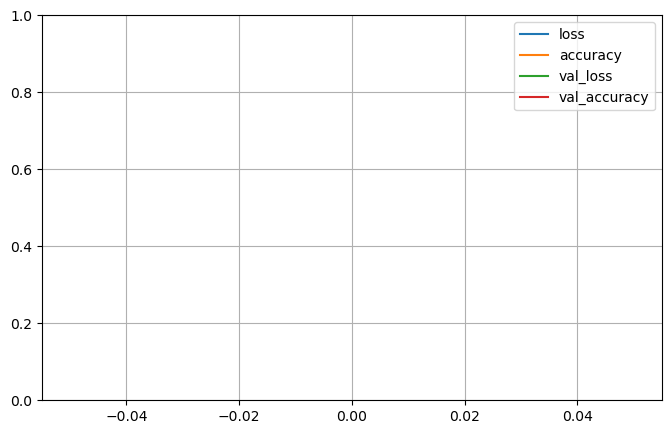

In [167]:
# Plot curves
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [168]:
# Save model
model.save("discriminator.h5")

C:\Users\leohj\miniconda3\envs\ethics\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
